In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install wordcloud

In [ ]:
!pip install dataframe_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 20.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving label_fix.csv to label_fix.csv


In [ ]:
df = pd.read_csv('label_fix.csv')
df.head(10)

,Jawaban,perceived ease of use,performance expectancy,effort expectancy,system quality,perceived usefulness,resistance to change,facilitating conditions,technological incapability,functionality,cost
0,"Palingnya chat sama dokter, sama informasi di ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,"bayar, saya dulu juga dari kantor Paling bayar...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Paling itu aja sih paling ongkir sama vitamin ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,"Percaya diri, Iya karena enak gampang aja gitu...",0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Maksudnya ada rasa was-was kan buat ke dokter,...",0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Lebih efisien, terus saya juga lebih informasi...",0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6,"Buat jaga-jaga juga, biar lebih efisien waktu ...",0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7,"Ya, dari lihat dari teman-teman pakai , suami...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,"Iya, sangat, sangat membantu",0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
9,"Ya kan mereka dokter ya, maksudnya bisa diperc...",0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
df.fillna("0", inplace=True)
df.isnull().sum()

Jawaban                       0
perceived ease of use         0
performance expectancy        0
effort expectancy             0
system quality                0
perceived usefulness          0
resistance to change          0
facilitating conditions       0
technological incapability    0
functionality                 0
cost                          0
dtype: int64

In [ ]:
df.dtypes

Jawaban                       object
perceived ease of use         object
performance expectancy        object
effort expectancy             object
system quality                object
perceived usefulness          object
resistance to change          object
facilitating conditions       object
technological incapability    object
functionality                 object
cost                          object
dtype: object

In [ ]:
# Mengganti string kosong atau spasi dengan NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
df = df.astype({'perceived ease of use': 'int', 'performance expectancy' : 'int', 'effort expectancy' : 'int', 'system quality' : 'int', 'perceived usefulness' : 'int', 'resistance to change' : 'int', 'facilitating conditions' : 'int', 'technological incapability': 'int', 'functionality' : 'int', 'cost': 'int'})
df.dtypes

Jawaban                       object
perceived ease of use          int64
performance expectancy         int64
effort expectancy              int64
system quality                 int64
perceived usefulness           int64
resistance to change           int64
facilitating conditions        int64
technological incapability     int64
functionality                  int64
cost                           int64
dtype: object

In [ ]:
column_list = [col for col in df.columns if col != 'Jawaban']
column_list

['perceived ease of use',
 'performance expectancy',
 'effort expectancy',
 'system quality',
 'perceived usefulness',
 'resistance to change',
 'facilitating conditions',
 'technological incapability',
 'functionality',
 'cost']

In [ ]:
df.shape

(1004, 11)

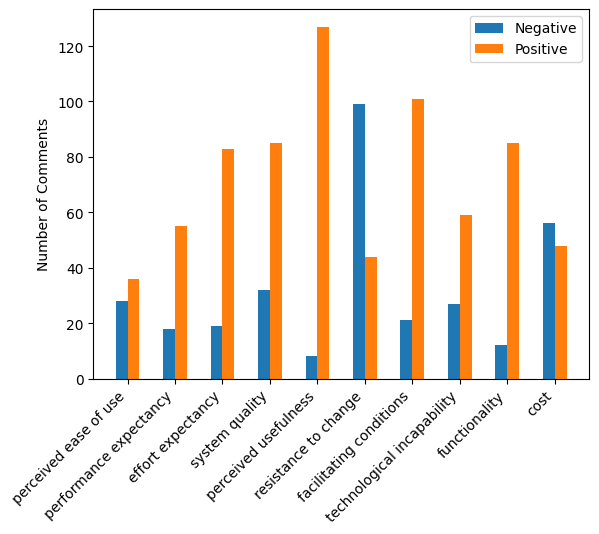

In [ ]:
# Menghitung jumlah komentar negatif
neg = [(df['perceived ease of use'] == 1).sum(), (df['performance expectancy'] == 1).sum(), (df['effort expectancy'] == 1).sum(), (df['system quality'] == 1).sum(), (df['perceived usefulness'] == 1).sum(), (df['resistance to change'] == 1).sum(), (df['facilitating conditions'] == 1).sum(), (df['technological incapability'] == 1).sum(), (df['functionality'] == 1).sum(), (df['cost'] == 1).sum()]

# Menghitung jumlah komentar positif
pos = [(df['perceived ease of use'] == 2).sum(), (df['performance expectancy'] == 2).sum(), (df['effort expectancy'] == 2).sum(), (df['system quality'] == 2).sum(), (df['perceived usefulness'] == 2).sum(), (df['resistance to change'] == 2).sum(), (df['facilitating conditions'] == 2).sum(), (df['technological incapability'] == 2).sum(), (df['functionality'] == 2).sum(), (df['cost'] == 2).sum()]

X_axis = np.arange(len(column_list))
width = 0.25

# plt.bar(X_axis, unr, width, label = 'not related')
plt.bar(X_axis,       neg, width, label = 'Negative')
plt.bar(X_axis+width, pos, width, label = 'Positive')


plt.xticks(X_axis + width / 2, column_list, rotation=45, ha='right')
# plt.xlabel("Aspects")
plt.ylabel("Number of Comments")
# plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [ ]:
texts = df['Jawaban'].tolist()

aspek = df[column_list].values.tolist()
labels = np.array(aspek)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
import pandas as pd

# Initialize stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# List of additional stopwords
extra_stopwords =  [
    'yang', 'dan', 'di', 'ke', 'dari', 'pada', 'adalah', 'ini', 'untuk', 'dengan',
    'saya', 'itu', 'atau', 'gitu', 'sok', 'hooh', 'ter', 'nih',
    'kalau', 'kan', 'misal', 'kadang', 'lah', 'tuh', 'aku', 'situ', 'sama', 'kayak',
    'aja', 'mah', 'cuma', 'cuman', 'sih'
]

# Load Indonesian stopwords and add extra stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords_indo = set(stopwords.words('indonesian'))
stopwords_indo.update(extra_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove characters at the start
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace multiple spaces with single space
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text.lower()

# Function for text preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords_indo and len(word) > 2]
    return tokens

In [ ]:
# Apply preprocessing
def preprocess_dataset(df):
    clean_data = []
    for text in df['Jawaban']:
        text = clean_text(text)
        text = stemmer.stem(text)
        tokens = preprocess_text(text)
        clean_data.append(' '.join(tokens))
    df['Jawaban'] = clean_data
    return df

df = preprocess_dataset(df)

In [ ]:
df.head(10)

,Jawaban,perceived ease of use,performance expectancy,effort expectancy,system quality,perceived usefulness,resistance to change,facilitating conditions,technological incapability,functionality,cost
0,chat dokter informasi halodok chat dokter lang...,0,0,0,0,0,0,0,0,2,0
1,bayar kantor bayar cover vitamin bayar,0,0,0,0,0,0,0,0,0,1
2,ongkir vitamin cover bayar,0,0,0,0,0,0,0,0,0,1
3,percaya iya enak gampang pandemi,0,0,2,0,0,0,0,0,0,0
4,maksud was was dokter halodok gampang cepat do...,0,0,2,0,0,0,0,0,0,0
5,efisien informasi obat obat dokter gampang rum...,0,0,2,0,2,0,0,0,0,0
6,jaga jaga biar efisien,0,0,0,0,2,0,0,0,0,0
7,lihat teman teman pakai suami pakai download,0,0,0,0,0,1,0,0,0,0
8,iya bantu,0,0,0,0,2,0,0,0,0,0
9,dokter maksud percaya insyaallah ajak nanya do...,0,0,0,0,0,0,2,0,0,0


In [ ]:
data_bersihh = ' '.join(df['Jawaban'])
print(len(data_bersihh))
print(data_bersihh)

53446
chat dokter informasi halodok chat dokter langsung bayar kantor bayar cover vitamin bayar ongkir vitamin cover bayar percaya iya enak gampang pandemi maksud was was dokter halodok gampang cepat dokter efisien informasi obat obat dokter gampang rumah pandemi jaga jaga biar efisien lihat teman teman pakai suami pakai download iya bantu dokter maksud percaya insyaallah ajak nanya dok gin iya respon percaya daftar cepat udah dapet nomernya pergi rumah sakit puskesmas praktis pakai aplikasi mudah dokter cepat pakai aplikasi ngantri nunggunya pakai aplikasi udah tera jam gin langsung ngantri hambat kendala gimana jaring sesuai gimana dokter meriksa pasien pasien jam ngikut ngantrinya khusus administrasi gampang ajuin langsung online alas emang zaman udah canggih udah sistem pakai online serba online gampang laki laki perempuan mudah pakai aplikasi emang udah umur ngerti teknologi mudah umur pakai aplikasi sehat bantu emang sakit berat lambat nang langsung buru buru pasien emang butuh b

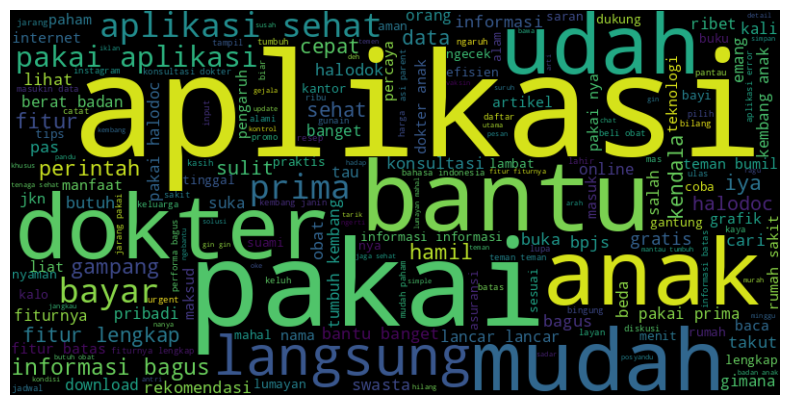

In [ ]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=400).generate(data_bersihh)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# One-Hot Encode the 'Category' Feature
df_encoded = pd.get_dummies(df, columns=column_list)
df_encoded.head()

,Jawaban,perceived ease of use_0,perceived ease of use_1,perceived ease of use_2,performance expectancy_0,performance expectancy_1,performance expectancy_2,effort expectancy_0,effort expectancy_1,effort expectancy_2,...,facilitating conditions_2,technological incapability_0,technological incapability_1,technological incapability_2,functionality_0,functionality_1,functionality_2,cost_0,cost_1,cost_2
0,chat dokter informasi halodok chat dokter lang...,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
1,bayar kantor bayar cover vitamin bayar,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
2,ongkir vitamin cover bayar,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,percaya iya enak gampang pandemi,True,False,False,True,False,False,False,False,True,...,False,True,False,False,True,False,False,True,False,False
4,maksud was was dokter halodok gampang cepat do...,True,False,False,True,False,False,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
# Tokenize and pad sequences
oov_tok = "<OOV>"
MAXLEN = 100  # Define the maximum sequence length

tokenizer = Tokenizer(num_words=10000, oov_token=oov_tok)
tokenizer.fit_on_texts(df_encoded['Jawaban'])

sequences = tokenizer.texts_to_sequences(df_encoded['Jawaban'])
padded_sequences = pad_sequences(sequences, truncating='pre', padding='pre', maxlen=MAXLEN)

In [ ]:
print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1  # Tambahkan +1 jika mempertimbangkan indeks 0
print(f'Jumlah kata unik: {vocab_size}')

{'<OOV>': 1, 'aplikasi': 2, 'pakai': 3, 'anak': 4, 'informasi': 5, 'sehat': 6, 'fitur': 7, 'bantu': 8, 'dokter': 9, 'bagus': 10, 'prima': 11, 'mudah': 12, 'udah': 13, 'langsung': 14, 'lengkap': 15, 'kembang': 16, 'bayar': 17, 'halodoc': 18, 'iya': 19, 'gampang': 20, 'hamil': 21, 'data': 22, 'perintah': 23, 'kendala': 24, 'obat': 25, 'banget': 26, 'cepat': 27, 'teman': 28, 'lancar': 29, 'sulit': 30, 'fiturnya': 31, 'konsultasi': 32, 'gratis': 33, 'batas': 34, 'tumbuh': 35, 'butuh': 36, 'lihat': 37, 'takut': 38, 'nya': 39, 'swasta': 40, 'rumah': 41, 'rekomendasi': 42, 'paham': 43, 'pas': 44, 'lumayan': 45, 'halodok': 46, 'berat': 47, 'jkn': 48, 'buka': 49, 'suka': 50, 'cari': 51, 'gin': 52, 'sakit': 53, 'bpjs': 54, 'badan': 55, 'online': 56, 'download': 57, 'emang': 58, 'orang': 59, 'pribadi': 60, 'kali': 61, 'mahal': 62, 'gimana': 63, 'tau': 64, 'beda': 65, 'internet': 66, 'ribet': 67, 'salah': 68, 'bahasa': 69, 'teknologi': 70, 'lambat': 71, 'jarang': 72, 'pengaruh': 73, 'percaya': 74,

In [ ]:
print(padded_sequences)
print(padded_sequences.shape)

[[  0   0   0 ...  99   9  14]
 [  0   0   0 ... 441 290  17]
 [  0   0   0 ... 290 441  17]
 ...
 [  0   0   0 ... 577 127   2]
 [  0   0   0 ... 215   4  60]
 [  0   0   0 ...  22  45 274]]
(1004, 100)


In [ ]:
df_encoded = df_encoded.drop(['perceived ease of use_0', 'performance expectancy_0', 'effort expectancy_0', 'system quality_0', 'perceived usefulness_0', 'resistance to change_0', 'facilitating conditions_0', 'technological incapability_0', 'functionality_0', 'cost_0'], axis=1)
column_list_sm = [col for col in df_encoded.columns if col != 'Jawaban']
print(df_encoded.shape)
print(column_list_sm)

(1004, 21)
['perceived ease of use_1', 'perceived ease of use_2', 'performance expectancy_1', 'performance expectancy_2', 'effort expectancy_1', 'effort expectancy_2', 'system quality_1', 'system quality_2', 'perceived usefulness_1', 'perceived usefulness_2', 'resistance to change_1', 'resistance to change_2', 'facilitating conditions_1', 'facilitating conditions_2', 'technological incapability_1', 'technological incapability_2', 'functionality_1', 'functionality_2', 'cost_1', 'cost_2']


In [ ]:
aspek_sm = df_encoded[column_list_sm].values.tolist()
labels_sm = np.array(aspek_sm)
labels_sm.shape

(1004, 20)

In [ ]:
labels_sm

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
# Split data menjadi data latih dan data uji
train_seq, test_seq, train_labels, test_labels = train_test_split(padded_sequences, labels_sm,
                                                                       test_size=0.2)
train_seq.shape

(803, 100)

In [ ]:
from keras.callbacks import Callback


class AccuracyHistory(Callback):
    def on_train_begin(self, logs=None):
        self.epoch_accuracy = []
        self.epoch_val_accuracy = []
        self.epoch_loss = []
        self.epoch_val_loss = []
        self.best_train_accuracy = 0
        self.best_val_accuracy = 0
        self.best_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        train_loss = logs.get('loss')
        val_loss = logs.get('val_loss')

        self.epoch_accuracy.append(train_accuracy)
        self.epoch_val_accuracy.append(val_accuracy)
        self.epoch_loss.append(train_loss)
        self.epoch_val_loss.append(val_loss)

        if train_accuracy is not None and train_accuracy > self.best_train_accuracy:
            self.best_train_accuracy = train_accuracy

        if val_accuracy is not None and val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = val_accuracy
            self.best_epoch = epoch

In [ ]:
# Callback untuk mencatat akurasi terbaik
history1 = AccuracyHistory()
history2= AccuracyHistory()
history3 = AccuracyHistory()

In [ ]:
# Definisikan parameter model
input_size = MAXLEN
hidden_layer_size = 256  # Lebih banyak neuron
output_size = len(column_list_sm)
lstm_dim = 128
embedding_dim = 50  # Lebih besar embedding dimension

# Membuat model
single_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Embedding(100000, embedding_dim, input_length=input_size),

    # LSTM layer
    tf.keras.layers.LSTM(lstm_dim),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    # Dense layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(0.3),

    # Output layer
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
# Compile the model with the learning rate scheduler
single_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

single_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           5000000   
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [ ]:
# Melatih model
history_1 = single_model.fit(train_seq, train_labels, epochs=25, batch_size=8,
                         validation_data=(test_seq, test_labels), callbacks=[history1])

Epoch 1/25
101/101 [==============================] - 17s 143ms/step - loss: 1.0289 - accuracy: 0.0797 - val_loss: 0.4945 - val_accuracy: 0.0597
Epoch 2/25
101/101 [==============================] - 14s 134ms/step - loss: 0.3322 - accuracy: 0.0872 - val_loss: 0.2495 - val_accuracy: 0.1144
Epoch 3/25
101/101 [==============================] - 14s 136ms/step - loss: 0.2310 - accuracy: 0.0984 - val_loss: 0.2092 - val_accuracy: 0.0896
Epoch 4/25
101/101 [==============================] - 14s 136ms/step - loss: 0.2120 - accuracy: 0.1171 - val_loss: 0.2018 - val_accuracy: 0.0995
Epoch 5/25
101/101 [==============================] - 16s 155ms/step - loss: 0.1882 - accuracy: 0.2902 - val_loss: 0.1949 - val_accuracy: 0.1592
Epoch 6/25
101/101 [==============================] - 13s 133ms/step - loss: 0.1380 - accuracy: 0.5816 - val_loss: 0.1541 - val_accuracy: 0.5373
Epoch 7/25
101/101 [==============================] - 14s 136ms/step - loss: 0.1116 - accuracy: 0.7248 - val_loss: 0.1232 - val_ac

In [ ]:
best_epoch = max(range(len(history_1.history['val_accuracy'])), key=lambda i: history_1.history['val_accuracy'][i])
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Accuracy: {history_1.history['accuracy'][best_epoch]}")
print(f"Best Validation Accuracy: {history_1.history['val_accuracy'][best_epoch]}")

Best Epoch: 20
Best Accuracy: 0.9265255331993103
Best Validation Accuracy: 0.8358209133148193


In [ ]:
# Definisikan parameter model
input_size = MAXLEN
hidden_layer_size = 256  # Lebih banyak neuron
output_size = len(column_list_sm)
lstm_dim = 128
embedding_dim = 50  # Lebih besar embedding dimension

# Membuat model
single_model16 = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Embedding(100000, embedding_dim, input_length=input_size),

    # LSTM layer
    tf.keras.layers.LSTM(lstm_dim),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    # Dense layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(0.3),

    # Output layer
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
# Compile the model with the learning rate scheduler
single_model16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

single_model16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           5000000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               91648     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# Melatih model
history_2 = single_model16.fit(train_seq, train_labels, epochs=25, batch_size=16,
                         validation_data=(test_seq, test_labels), callbacks=[history2])

Epoch 1/25
51/51 [==============================] - 12s 165ms/step - loss: 1.4148 - accuracy: 0.0399 - val_loss: 0.8196 - val_accuracy: 0.0995
Epoch 2/25
51/51 [==============================] - 7s 128ms/step - loss: 0.5694 - accuracy: 0.0785 - val_loss: 0.4452 - val_accuracy: 0.0995
Epoch 3/25
51/51 [==============================] - 8s 152ms/step - loss: 0.3387 - accuracy: 0.0922 - val_loss: 0.2872 - val_accuracy: 0.1144
Epoch 4/25
51/51 [==============================] - 6s 124ms/step - loss: 0.2533 - accuracy: 0.0996 - val_loss: 0.2257 - val_accuracy: 0.1144
Epoch 5/25
51/51 [==============================] - 8s 156ms/step - loss: 0.2209 - accuracy: 0.1108 - val_loss: 0.2054 - val_accuracy: 0.1144
Epoch 6/25
51/51 [==============================] - 7s 128ms/step - loss: 0.2096 - accuracy: 0.1046 - val_loss: 0.2007 - val_accuracy: 0.1144
Epoch 7/25
51/51 [==============================] - 8s 152ms/step - loss: 0.2068 - accuracy: 0.1071 - val_loss: 0.1997 - val_accuracy: 0.1144
Epoch

In [ ]:
best_epoch = max(range(len(history_2.history['val_accuracy'])), key=lambda i: history_2.history['val_accuracy'][i])
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Accuracy: {history_2.history['accuracy'][best_epoch]}")
print(f"Best Validation Accuracy: {history_2.history['val_accuracy'][best_epoch]}")

Best Epoch: 25
Best Accuracy: 0.9339975118637085
Best Validation Accuracy: 0.8457711338996887


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Evaluasi model pada data uji
test_loss, test_accuracy = single_model16.evaluate(test_seq, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

7/7 [==============================] - 0s 38ms/step - loss: 0.0804 - accuracy: 0.8458
Test Loss: 0.0804
Test Accuracy: 0.8458


In [ ]:
# Prediksi pada data uji
test_predictions = single_model16.predict(test_seq)
test_predictions = np.round(test_predictions).astype(int)

# Membuat confusion matrix untuk data uji
conf_matrix_test_1 = confusion_matrix(test_labels.argmax(axis=1), test_predictions.argmax(axis=1))

7/7 [==============================] - 1s 52ms/step


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Mengubah label dan prediksi menjadi bentuk 1D jika masih dalam one-hot encoding
true_labels = test_labels.argmax(axis=1)
pred_labels = test_predictions.argmax(axis=1)

# Daftar nama label
column_list_sm = ['perceived ease of use_1', 'perceived ease of use_2', 'performance expectancy_1', 'performance expectancy_2',
                  'effort expectancy_1', 'effort expectancy_2', 'system quality_1', 'system quality_2',
                  'perceived usefulness_1', 'perceived usefulness_2', 'resistance to change_1', 'resistance to change_2',
                  'facilitating conditions_1', 'facilitating conditions_2', 'technological incapability_1',
                  'technological incapability_2', 'functionality_1', 'functionality_2', 'cost_1', 'cost_2']

# Membuat pasangan label
label_pairs = [(column_list_sm[i], column_list_sm[i+1]) for i in range(0, len(column_list_sm), 2)]

# Inisialisasi dictionary untuk menyimpan metrik
metrics = {
    'precision': [],
    'recall': [],
    'f1-score': [],
    'accuracy': []
}

# Membuat laporan klasifikasi untuk setiap pasangan label
print('Classification Report (Test Data)')

for label1, label2 in label_pairs:
    index1 = column_list_sm.index(label1)
    index2 = column_list_sm.index(label2)

    # Filter data untuk hanya dua kelas saat ini
    valid_indices = np.where((true_labels == index1) | (true_labels == index2))[0]
    binary_true_labels = true_labels[valid_indices]
    binary_pred_labels = pred_labels[valid_indices]

    # Mengubah label menjadi biner
    binary_true_labels = np.where(binary_true_labels == index1, 0, 1)
    binary_pred_labels = np.where(binary_pred_labels == index1, 0, 1)

    # Mencetak laporan klasifikasi tanpa pengecekan jumlah kelas
    report = classification_report(binary_true_labels, binary_pred_labels, target_names=[label1, label2], output_dict=True, zero_division=0)
    print(f"\nLabel: {label1[:-2]}")
    print(classification_report(binary_true_labels, binary_pred_labels, target_names=[label1, label2], zero_division=0))

    # Mengumpulkan metrik jika kedua kelas memiliki data
    if 'accuracy' in report:
        metrics['precision'].append((report[label1]['precision'] + report[label2]['precision']) / 2)
        metrics['recall'].append((report[label1]['recall'] + report[label2]['recall']) / 2)
        metrics['f1-score'].append((report[label1]['f1-score'] + report[label2]['f1-score']) / 2)
        metrics['accuracy'].append(report['accuracy'])


Classification Report (Test Data)

Label: perceived ease of use
                         precision    recall  f1-score   support

perceived ease of use_1       0.86      0.60      0.71        10
perceived ease of use_2       0.43      0.75      0.55         4

               accuracy                           0.64        14
              macro avg       0.64      0.68      0.63        14
           weighted avg       0.73      0.64      0.66        14


Label: performance expectancy
                          precision    recall  f1-score   support

performance expectancy_1       1.00      0.40      0.57         5
performance expectancy_2       0.70      1.00      0.82         7

                accuracy                           0.75        12
               macro avg       0.85      0.70      0.70        12
            weighted avg       0.82      0.75      0.72        12


Label: effort expectancy
                     precision    recall  f1-score   support

effort expectancy_1      

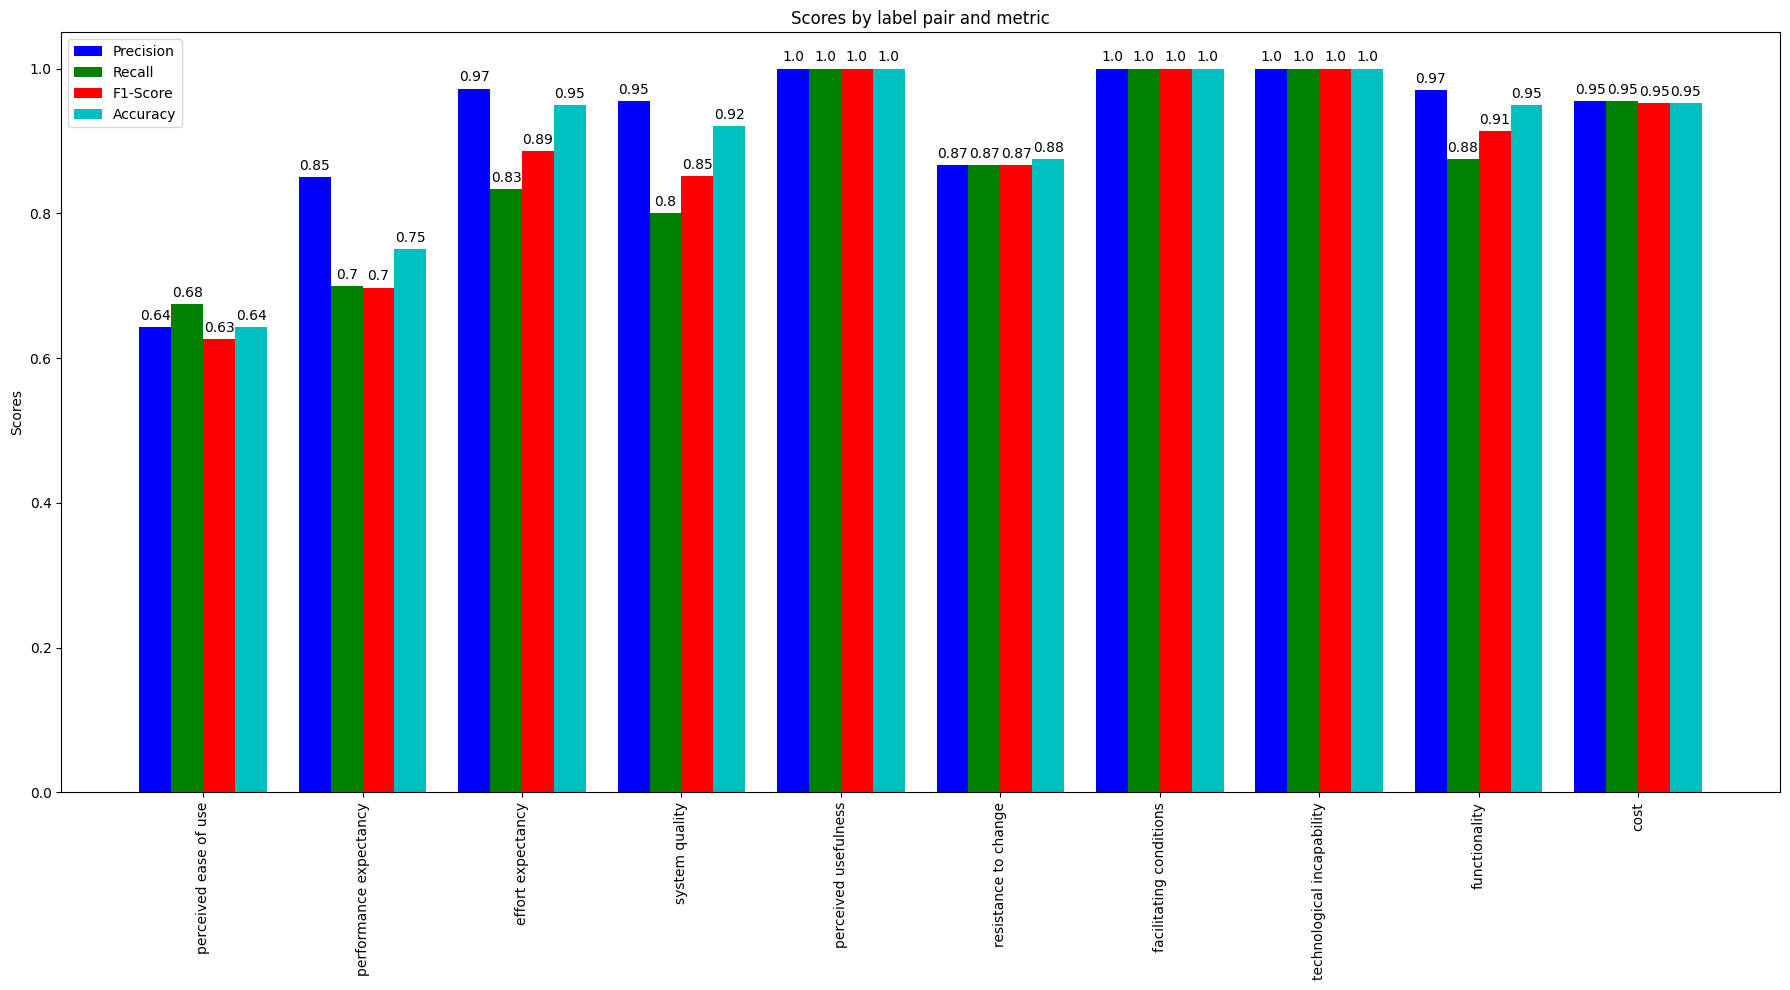

In [ ]:
import matplotlib.pyplot as plt

# Membuat bar chart gabungan untuk setiap metrik
labels = [f"{label1[:-2]}" for label1, label2 in label_pairs]
x = np.arange(len(metrics['precision']))  # Label locations sesuai dengan jumlah metrik yang terkumpul
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(18, 10))

rects1 = ax.bar(x - 1.5*width, metrics['precision'], width, label='Precision', color='b')
rects2 = ax.bar(x - 0.5*width, metrics['recall'], width, label='Recall', color='g')
rects3 = ax.bar(x + 0.5*width, metrics['f1-score'], width, label='F1-Score', color='r')
rects4 = ax.bar(x + 1.5*width, metrics['accuracy'], width, label='Accuracy', color='c')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by label pair and metric')
ax.set_xticks(x)
ax.set_xticklabels(labels[:len(x)], rotation=90)  # Pastikan hanya label yang sesuai dengan metrik yang tampil
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


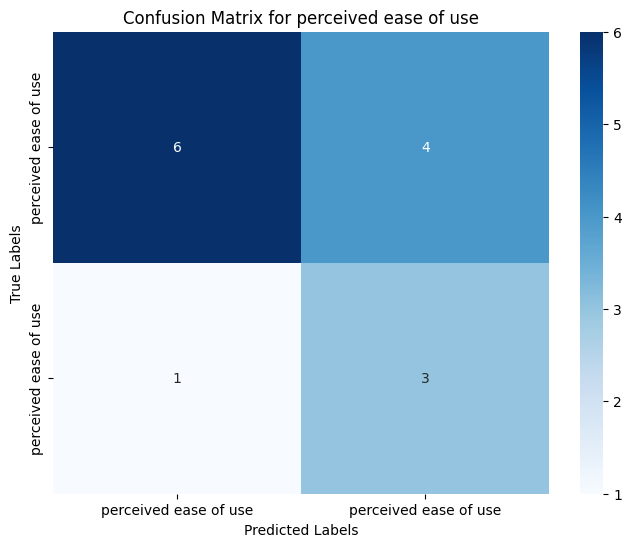

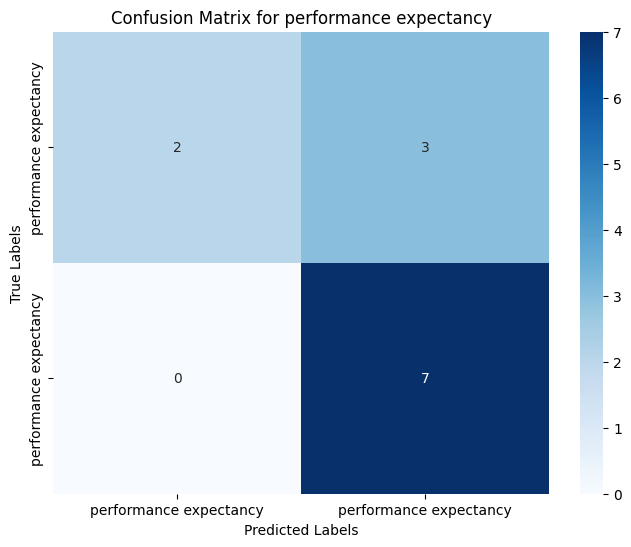

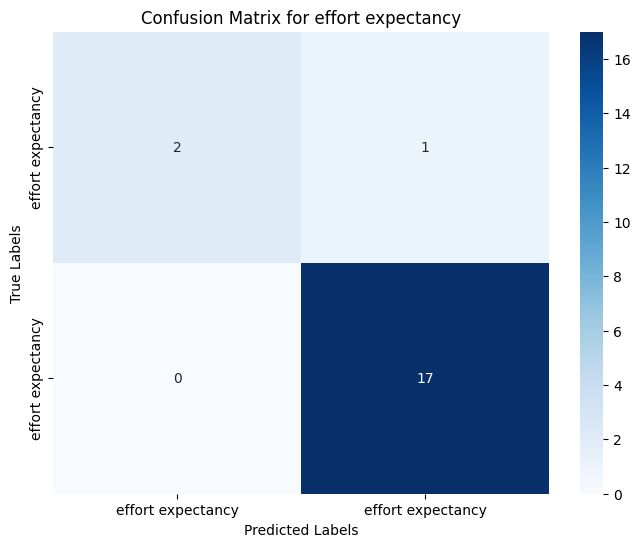

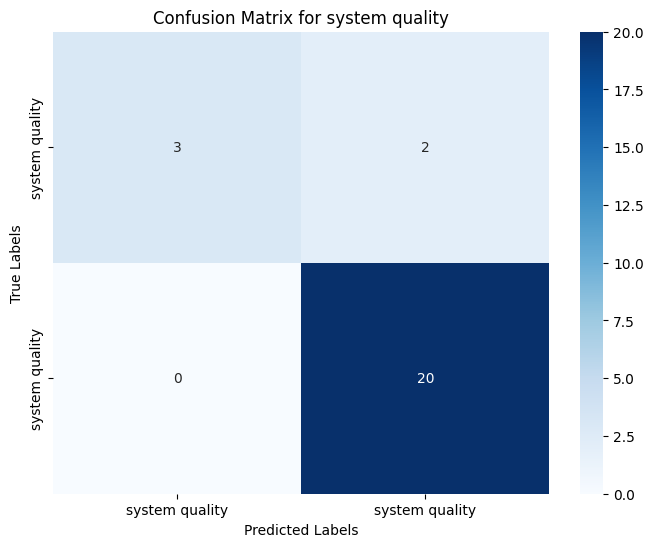

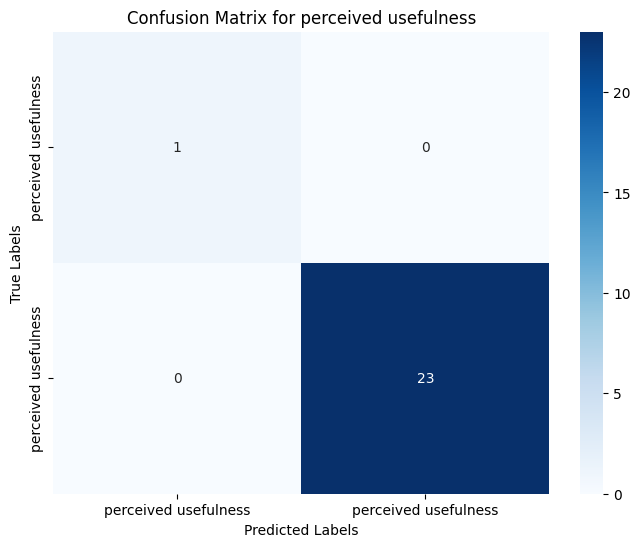

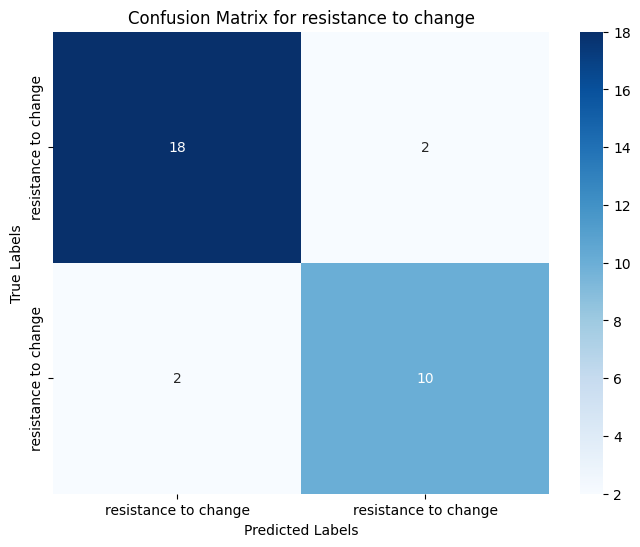

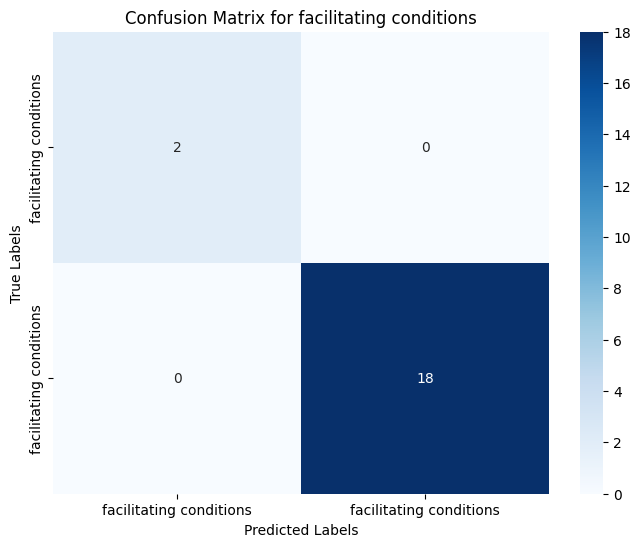

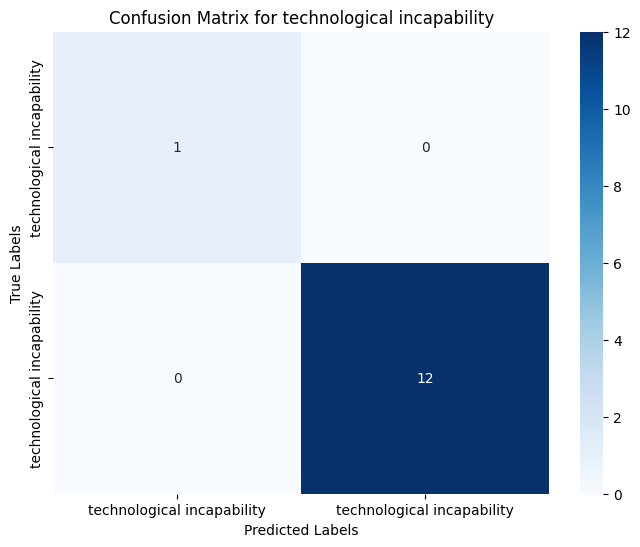

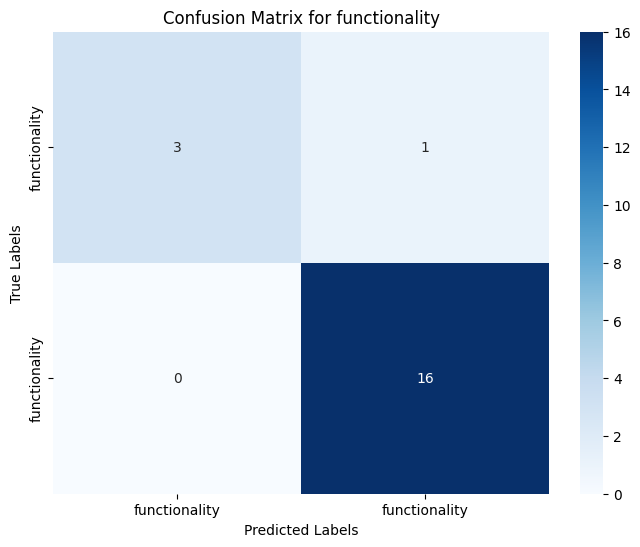

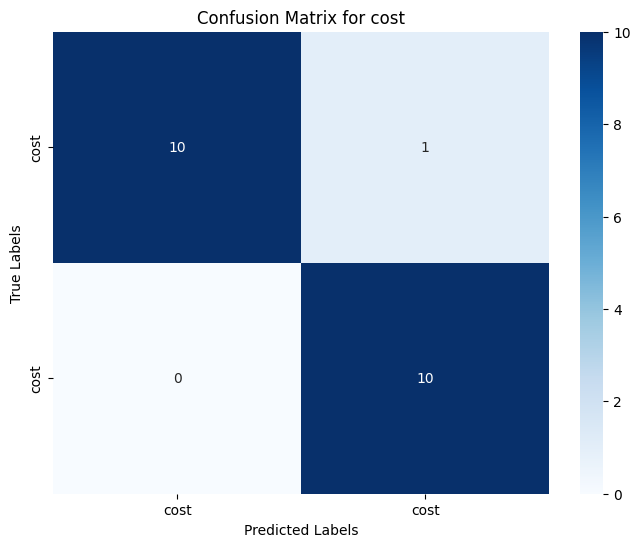

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah label dan prediksi menjadi bentuk 1D jika masih dalam one-hot encoding
true_labels = test_labels.argmax(axis=1)
pred_labels = test_predictions.argmax(axis=1)

# Daftar nama label
column_list_sm = ['perceived ease of use_1', 'perceived ease of use_2', 'performance expectancy_1', 'performance expectancy_2',
                  'effort expectancy_1', 'effort expectancy_2', 'system quality_1', 'system quality_2',
                  'perceived usefulness_1', 'perceived usefulness_2', 'resistance to change_1', 'resistance to change_2',
                  'facilitating conditions_1', 'facilitating conditions_2', 'technological incapability_1',
                  'technological incapability_2', 'functionality_1', 'functionality_2', 'cost_1', 'cost_2']

# Membuat pasangan label
label_pairs = [(column_list_sm[i], column_list_sm[i+1]) for i in range(0, len(column_list_sm), 2)]

# Membuat confusion matrix untuk setiap pasangan label
for label1, label2 in label_pairs:
    index1 = column_list_sm.index(label1)
    index2 = column_list_sm.index(label2)

    # Filter data untuk hanya dua kelas saat ini
    valid_indices = np.where((true_labels == index1) | (true_labels == index2))[0]
    binary_true_labels = true_labels[valid_indices]
    binary_pred_labels = pred_labels[valid_indices]

    # Mengubah label menjadi biner
    binary_true_labels = np.where(binary_true_labels == index1, 0, 1)
    binary_pred_labels = np.where(binary_pred_labels == index1, 0, 1)

    # Membuat dan menampilkan confusion matrix
    cm = confusion_matrix(binary_true_labels, binary_pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[label1[:-2], label2[:-2]], yticklabels=[label1[:-2], label2[:-2]])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {label1[:-2]}')
    plt.show()


In [ ]:
# Definisikan parameter model
input_size = MAXLEN
hidden_layer_size = 256  # Lebih banyak neuron
output_size = len(column_list_sm)
lstm_dim = 128
embedding_dim = 50  # Lebih besar embedding dimension

# Membuat model
single_model32 = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Embedding(100000, embedding_dim, input_length=input_size),

    # LSTM layer
    tf.keras.layers.LSTM(lstm_dim),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    # Dense layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(0.3),

    # Output layer
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
# Compile the model with the learning rate scheduler
single_model32.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

single_model32.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           5000000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               91648     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
# Melatih model
history_3 = single_model32.fit(train_seq, train_labels, epochs=25, batch_size=32,
                         validation_data=(test_seq, test_labels), callbacks=[history3])

Epoch 1/25
26/26 [==============================] - 8s 203ms/step - loss: 1.7584 - accuracy: 0.0598 - val_loss: 1.4811 - val_accuracy: 0.0896
Epoch 2/25
26/26 [==============================] - 6s 243ms/step - loss: 0.9454 - accuracy: 0.0984 - val_loss: 0.8661 - val_accuracy: 0.1493
Epoch 3/25
26/26 [==============================] - 5s 178ms/step - loss: 0.5826 - accuracy: 0.1146 - val_loss: 0.6254 - val_accuracy: 0.1045
Epoch 4/25
26/26 [==============================] - 5s 199ms/step - loss: 0.3916 - accuracy: 0.1258 - val_loss: 0.4454 - val_accuracy: 0.1095
Epoch 5/25
26/26 [==============================] - 6s 214ms/step - loss: 0.2988 - accuracy: 0.1258 - val_loss: 0.3861 - val_accuracy: 0.1095
Epoch 6/25
26/26 [==============================] - 5s 196ms/step - loss: 0.2517 - accuracy: 0.1445 - val_loss: 0.3350 - val_accuracy: 0.1244
Epoch 7/25
26/26 [==============================] - 8s 312ms/step - loss: 0.2268 - accuracy: 0.1781 - val_loss: 0.3148 - val_accuracy: 0.1343
Epoch 

In [ ]:
best_epoch = max(range(len(history_3.history['val_accuracy'])), key=lambda i: history_3.history['val_accuracy'][i])
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Accuracy: {history_3.history['accuracy'][best_epoch]}")
print(f"Best Validation Accuracy: {history_3.history['val_accuracy'][best_epoch]}")

Best Epoch: 24
Best Accuracy: 0.8904109597206116
Best Validation Accuracy: 0.8009950518608093
